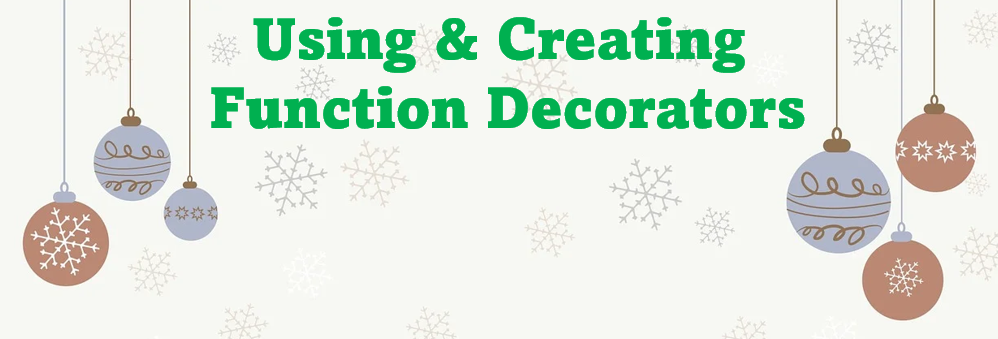

### Function Decorators

Documentation at https://realpython.com/primer-on-python-decorators/

### Why you need to know them:
- They are everywhere and you will be using them.
- They offer a powerful and elegant way to extend functions without changing them.
- Provide an extensible and maintainable way to add standard functionality across many functions.
- Ideal for providing an easy way for users to plug into your frameworks.

Decorators extend the functionality of an existing function.
You know its a decorator when you see a line above a function like:

```
@somedecorator
def myfunction():
    pass
```


Examples are decorators used in popular Python frameworks.

Example from the Django Web App framework

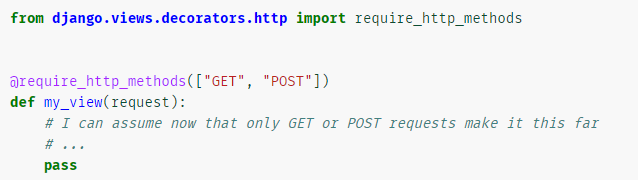

Example from Apache Airflow

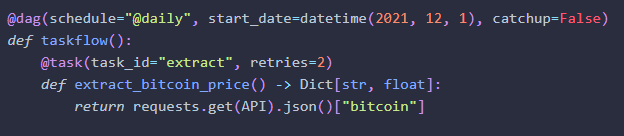

Flask Example

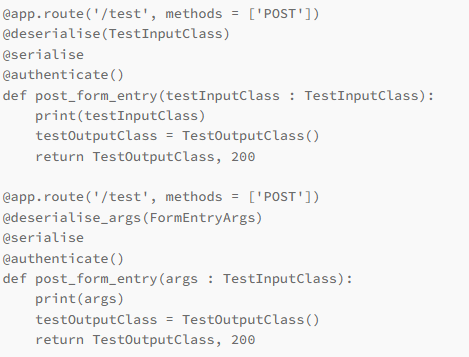

Databricks Delta Live Tables (DLT)

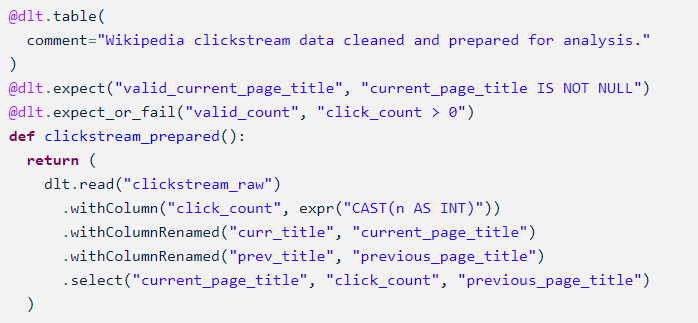

### Python Standard Library Decorators
https://wiki.python.org/moin/Decorators

#### Let's Create Our Own Decorators

In [62]:
def my_decorator(func, *args, **kwargs):
    def new_function(*args, **kwargs):
        print("Something is happening before the function is called.")
        
        func(*args, **kwargs)
        
        print('Arguments are: ', args)
        print('Keyword Arguments are: ', kwargs)
        print("Something is happening after the function is called.")
    return new_function

In [63]:
def say_whee(x, y, **kwargs):
    print("Whee! That was fun ", kwargs['name'])

say_whee(1, 2, name='Tom')   

Whee! That was fun  Tom


In [64]:
@my_decorator
def say_whee(x, y, **kwargs):
    print("Whee! That was fun ", kwargs['name'])

In [65]:
say_whee(1, 2, name='Tom')

Something is happening before the function is called.
Whee! That was fun  Tom
Arguments are:  (1, 2)
Keyword Arguments are:  {'name': 'Tom'}
Something is happening after the function is called.


#### Another syntax to do the same thing!

In [66]:
def other_func():
    print("Other!")

In [67]:
v = my_decorator(other_func)

In [68]:
v()

Something is happening before the function is called.
Other!
Arguments are:  ()
Keyword Arguments are:  {}
Something is happening after the function is called.


### A real world example, timing the execution of functions
https://dev.to/kcdchennai/python-decorator-to-measure-execution-time-54hk

In [69]:
from functools import wraps
import time

def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f'Function {func.__name__}{args} {kwargs} Took {total_time:.4f} seconds')
        return result
    return timeit_wrapper

In [70]:
@timeit
def add_numbers(x, y):
    print("Answer is ", x + y )

In [71]:
add_numbers(1, 22)

Answer is  23
Function add_numbers(1, 22) {} Took 0.0007 seconds


In [72]:
@timeit
def use_range():
    y = 0 
    for x in range(100):
        y+=x
    print('Answer is: ', y)    

In [73]:
use_range()

Answer is:  4950
Function use_range() {} Took 0.0005 seconds


Take-A-Ways

- Decorators are an elegant way to extend functions.
- Decorators are extensively used throughout the Python ecosystem.
- Best part of decorators is that they allow you to add or remove functionality without changing the deorated function.
- Decorators are a bit like function inheritance.
- Ideal for providing an easy way for users to plug into your frameworks.